In [14]:
import notebook_support

In [37]:
import tilesource
tilesource = reload(tilesource)

In [52]:
test_tile = dict(
    z = 15,
    x = 5335,
    y = 11574
)

In [57]:
test_tile = dict(
    z = 13,
    x = 1338,
    y = 2823 
)

In [58]:
tile_images = tilesource.source_images(**test_tile)

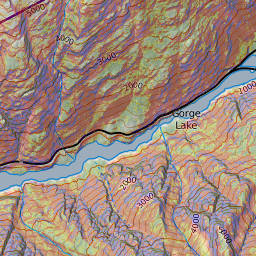

In [59]:
tilesource.overlay_image(tile_images["mb"], tilesource.clip_image_alpha(tile_images["fs"], 64))

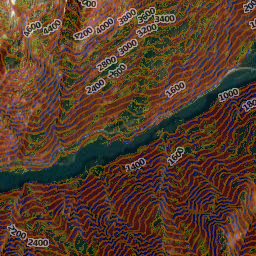

In [60]:
tilesource.overlay_image(
    tile_images["im"],
    tilesource.clip_image_alpha(tile_images["fs"], 64),
    tilesource.clip_image_alpha(tile_images["ct"], 128),
)

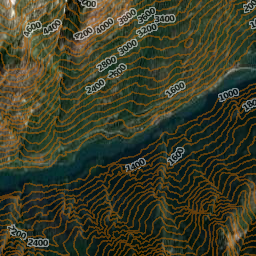

In [62]:
tilesource.overlay_image(
    tile_images["im"],
    tilesource.clip_image_alpha(tile_images["ct"], 128),
)